# Credit Card Fraud Detection

Fraud detection is a big topic in financial area. For data scientist, fraud detection is about dealing with imbalance data. Here, I show several resampling methods and machine learning models to find the best combination for prediction.

##description of each fields:

Columns | Description
--- | ---
Time | Number of seconds elapsed between this transaction and the first transaction in the dataset
V1 | may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

# 1.Data Exploration and Clean

In [ ]:
from google.colab import drive

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

from scipy.stats import multivariate_normal

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [ ]:
drive.mount('/content/drive')

df = pd.read_csv('drive/My Drive/20210401/Fraud_Detection/creditcard.csv') 
df.head()

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print(df.shape)

(284807, 31)


In [ ]:
print(df.columns.values)

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


In [ ]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#Distribution of the Class column
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
#null checking
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

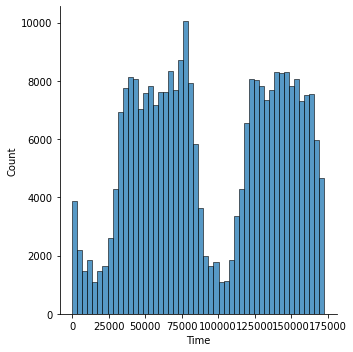

In [ ]:
sns.displot(df['Time'],bins =50)

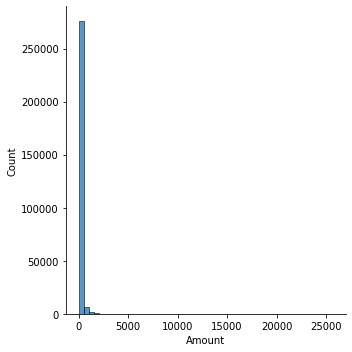

In [ ]:
sns.displot(df['Amount'],bins =50)

The amount and time column has a problem of data skewness, need to fix it


In [ ]:
df['log_Amount'] = np.log(df['Amount'] + 1)
df['log_Time'] = np.log(df['Time'] + 1)
df.drop(['Time','Amount'], axis=1, inplace=True)

In [ ]:
# sns.set_style("ticks")
# __,ax  = plt.subplots(ncols = 2,nrows =1,figsize = (10,10))
# sns.boxplot(x = "Class", y = "Amount", data=df, ax = ax[0])
# sns.boxplot(x = "Class",y = "log_amount", data =df, ax = ax[1])

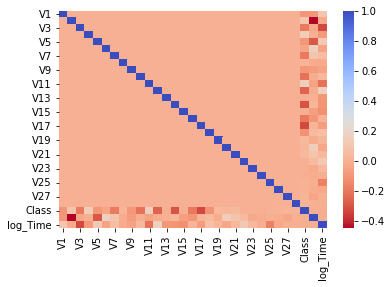

In [ ]:
# check correlation
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm_r')

In order to deal with imblanced data problem in fraud detection problem, I will apply several methods. 

# K-fold cross validation & ml model(random forest)


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=1) 

In [ ]:
# RF_model.fit(X_train, y_train)
# y_pred = RF_model.predict(X_test)


In [ ]:
rf=RandomForestClassifier(random_state=1,max_features='sqrt')
rf.fit(X_train,y_train)
pred_y=rf.predict(X_test)
recall_score_rf = recall_score(y_test, pred_y, average = "binary")
print ('recall score: ', recall_score_rf)

recall score:  0.8571428571428571


# Unsupervised Learning

## Distribution based model

In [ ]:
normal = df[df['Class'] == 0]
anomaly = df[df['Class'] == 1]

train, small_normal = train_test_split(normal, test_size=0.2, random_state=0)
normal_valid, normal_test = train_test_split(small_normal, test_size=0.5, random_state=0)#2000 : 2000 good hd
anomaly_valid, anomaly_test = train_test_split(anomaly, test_size=0.5, random_state=0)#10 : 10 bad hd

validation = pd.concat([normal_valid, anomaly_valid])#include both good and bad, cross validation data in our text
test = pd.concat([normal_test, anomaly_test])#include both good and bad


print(validation.shape)
print(test.shape)
train = train.drop(columns = ['Class']).reset_index(drop= True)#no need of label in train data, drop it
print(train.shape)

(28677, 31)
(28678, 31)
(227452, 30)


In [ ]:
featureNames = list(train.columns.values)#feature names only, no label
valFeatures = validation[featureNames].reset_index(drop= True)#feature df only, no label
testFeatures = test[featureNames].reset_index(drop= True)#feature df only, no label

valLabel = validation['Class']#label df only
testLabel = test['Class']#label df only


In [ ]:
#find parameter for each col/feature in df for the Gaussian distribution
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

In [ ]:
mu, sigma = estimateGaussian(train)

In [ ]:
model = multivariate_normal(mean=mu, cov=sigma, allow_singular = True)#surface hat p(x)

In [ ]:
pdfVal = model.pdf(valFeatures)
print(max(pdfVal))#too small, can not differentiate
print(min(pdfVal))

p_val = model.logpdf(valFeatures)#Log of the pdf first, then apply to features, to change the magnitude of prob
print(max(p_val))#
print(min(p_val))

3.936022689247857e-12
0.0
-26.260850372210477
-7554.270217704678


In [ ]:
p = model.logpdf(train)
print(p.shape)
print((p_val.shape))

(227452,)
(28677,)


In [ ]:
scores = []
p_val = model.logpdf(valFeatures)#Log of the pdf

# thresholds = np.linspace(-1000, -10,150)
thresholds = np.linspace(min(p_val), max(p_val),200)#generate all candidate threshold, epsilon

#step 2:  find optimal threshold: bestThreshold
for threshold in thresholds:
  y_pred = (p_val < threshold).astype(int)# list of 0 and 1
  #calculate recall, precision and f1 for each (truth, pred) pair, corresponding to that threshold
  scores.append([recall_score(valLabel, y_pred),
                 precision_score(valLabel, y_pred),
                 f1_score(valLabel, y_pred, average = "binary")])

scores = np.array(scores)
maxIndex = scores[...,2].ravel().argmax()#maxIndex of the 3rd column (f1_score) #193, #.ravel return a flattened array
bestThreshold = thresholds[maxIndex]
print(scores.shape)#each row is a pair of (recall, precision, f1) corresponding to a threshold

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(200, 3)


In [ ]:
print(maxIndex)
print(bestThreshold)

193
-253.2360071762041


In [ ]:
y_test_pred_raw = model.logpdf(testFeatures)
y_pred_test = y_test_pred_raw < bestThreshold
recall_score1 = recall_score(testLabel, y_pred_test, average = "binary")
print('recall score: ', recall_score1)

recall score:  0.7642276422764228


## Isolation Forest

In [ ]:
featureNames = list(X_train.columns.values)#feature names only, no label
testFeatures = X_test[featureNames].reset_index(drop= True)#feature df only, no label
IFModel = IsolationForest(random_state=3, contamination = 0.01, n_estimators = 200, max_features = 2).fit(X_train)

# convert 1/-1 to 0/1 for f1 calculation
def convert(x):
  if x == 1:
    return 0
  else:
    return 1
pred = IFModel.predict(testFeatures) #1 for inliers, -1 for outliers.
pred2 = list(map(convert, pred))

print(f1_score(pred2, y_test, average = "binary"))
print(precision_score(pred2, y_test))
print(recall_score(pred2, y_test))




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


0.2011661807580175
0.7040816326530612
0.11734693877551021


# UnderSampling & Classifier

In [ ]:
# Undersampling
nm = NearMiss()
# fit and apply the transform
X_Under, y_Under = nm.fit_resample(X_train, y_train)


In [ ]:
print(X_Under.shape, y_Under.shape)

(788, 30) (788,)


In [ ]:
rf = RandomForestClassifier(random_state=2,max_features='sqrt')
rf.fit(X_Under,y_Under)
pred_y = rf.predict(X_test)
recall_score_rf = recall_score(y_test, pred_y, average = "binary")
print ('recall score: ', recall_score_rf)

recall score:  0.9897959183673469


# OverSampling & Classifier

In [ ]:
SMOTE_over = SMOTE(random_state=3)
# fit and apply the transform
X_Smote, y_Smote = SMOTE_over.fit_resample(X_train, y_train)

In [ ]:
print(X_Smote.shape, y_Smote.shape)

(454902, 30) (454902,)


In [ ]:
rf = RandomForestClassifier(random_state=1,max_features='sqrt')
rf.fit(X_Smote, y_Smote)
pred_y=rf.predict(X_test)
recall_score_rf = recall_score(y_test, pred_y, average = "binary")
print ('recall score: ', recall_score_rf)

recall score:  0.8673469387755102


# Conclusion

In this project, for high imblance dataset, I use recall score as model metric. Here are the results of recall score : 


*   k-fold CV & Random Forest: 0.85
*   Distribution based model: 0.76
*   Isolation Forest:  0.12
*   UnderSampling & Classifier: 0.99
*   OverSampling & Classifier: 0.87


Also, Near Miss undersampling method reduce the numbers of samples so it not only gain good recall score but also great process speed.   